# 4. Сферические функции

Автор: [Илья Ощепков](https://thegeodesy.com/)

In [1]:
import numpy as np

from sympy import *
from sympy.abc import n, m

colat = Symbol("theta")
lon = Symbol("lambda")

init_printing()

## Сферические функции как часть решения уравнения Лапласа

Решением уравнения Лапласа  
$$
\Delta f \left( r, \vartheta, \lambda \right) = \frac{\partial^{2} f}{\partial r^{2}} + 
\frac{2}{r} \frac{\partial f}{\partial r} + 
\frac{1}{r^{2}} \frac{\partial^{2} f}{\partial \vartheta^{2}}  + 
\frac{1}{r^{2} \tan{\vartheta}} \frac{\partial f}{\partial \vartheta} + 
\frac{1}{r^{2} \sin^{2}{\vartheta}} \frac{\partial^{2} f}{\partial \lambda^{2}} = 0
$$
в сферических координатах ($r, \vartheta, \lambda$) являются **ряды шаровых функций** вида
\begin{align*}
f \left(r, \vartheta, \lambda \right) &=
\sum\limits_{n=0}^{\infty} r^{n} Y_n (\vartheta, \lambda)
=\sum\limits_{n=0}^{\infty} r^{n} \sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}),\\
f \left(r, \vartheta, \lambda \right) &= \sum\limits_{n=0}^{\infty} \dfrac{1}{r^{n+1}}  Y_n (\vartheta, \lambda)
=\sum\limits_{n=0}^{\infty} \dfrac{1}{r^{n+1}} \sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}).
\end{align*}

В частности, на поверхности единичной сферы ($r = 1$), получим **ряд сферических функций**
\begin{align*}
f \left(\vartheta, \lambda \right) =
\sum\limits_{n=0}^{\infty} Y_n (\vartheta, \lambda)
=\sum\limits_{n=0}^{\infty}\sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}),
\end{align*}
также известный как **ряд Лапласа**.

Запись
$$
Y_n \left( \vartheta, \lambda \right) = 
\sum\limits_{m=0}^n Y_n^m \left( \vartheta, \lambda \right) =
\sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}),
$$
является **общим выражением для сферической функции степени $n$**. 

Каждый член этого выражения является **сферической функцией 
$Y_n^m \left( \vartheta, \lambda \right)$ степени $n$ и порядка $m$** вида
$$
Y_n^m \left( \vartheta, \lambda \right) = 
(A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}),
$$
Легко заметить, что это линейная комбинация двух функций, каждая из которых состоит 
из произведения присоединённой функции Лежандра $P_n^m (\cos{\vartheta})$ 
на $\cos{m\lambda}$ или $\sin{m\lambda}$, то есть
$$
A_n^m P_n^m (\cos{\vartheta}) \cos{m \lambda} ,\qquad
B_n^m P_n^m (\cos{\vartheta}) \sin{m \lambda}.
$$
Функции такого вида называются **элементарными** или **основными сферическими функцями** 
степени $n$ и порядка $m$.

Как мы увидим дальше, $A_n^m$ и $B_n^m$ являются числовыми коэффициентами, которые подлежат определению.

### Явный вид сферических функций и рядов

Для наглядности получим явный вид некоторых перечисленных выше функций и рядов для степени $n = 2$. 

Начнём с элементарных сферических функций.

In [2]:
def sph_harm_basic(n, m, colat, lon, cos_or_sin = 'both'):
    lafnm = (-1)**m * assoc_legendre(n, m, cos(colat))
    if cos_or_sin == 'cos':
        return cos(m * lon) * lafnm
    elif cos_or_sin == 'sin':
        return sin(m * lon) * lafnm
    elif cos_or_sin == 'both':
        return simplify(cos(m * lon) * lafnm), simplify(sin(m * lon) * lafnm)

Для $n=2, m=1$ получим:

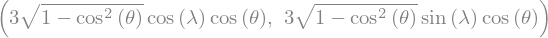

In [3]:
sph_harm_basic(2, 1, colat, lon, 'cos'), sph_harm_basic(2, 1, colat, lon, 'sin')

Линейная комбинация этих слагаемых даёт нам сферическую фукцию $n=2,m=1$:

In [4]:
def sph_harm(n, m, colat, lon):
    a = Symbol("A_" + str(n) + '^' + str(m))
    b = Symbol("B_" + str(n) + '^' + str(m))
    basics = sph_harm_basic(n, m, colat, lon, 'both')
    return a*basics[0] + b*basics[1]

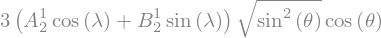

In [5]:
simplify(sph_harm(2, 1, colat, lon))

Общее выражение для сферической функции степени $n = 2$ найдём простой суммой всех элементарных сферических фукций степени $n$:

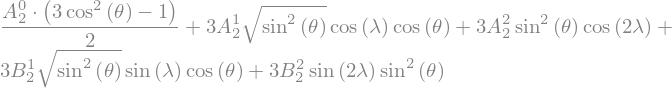

In [6]:
degree = 2
Ydegree = simplify(sum([sph_harm(degree, order, colat, lon) for order in range(0, degree+1)]))
Ydegree

Легко заметить, что **сферическая функция степени $n$ содержит $2n + 1$ членов**. 

Проверяем: для $n=2$ число членов $2n + 1 = 5$. Действительно,

In [7]:
len(Add.make_args(Ydegree))

Наконец, ряд Лапласа
\begin{align*}
f \left(\vartheta, \lambda \right) =
\sum\limits_{n=0}^{n_{max}}\sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}),
\end{align*}
ограниченный максимальной степенью $n_{max} = 2$ вместо бесконечности, получим, сложив все сферические функции степени до $n = 2$ включительно:

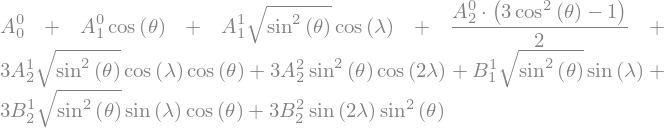

In [8]:
laplace_series = 0
for ni in range(0, degree+1):
        laplace_series += sum([sph_harm(ni, order, colat, lon) for order in range(0, ni+1)])
simplify(laplace_series)

Усечённый маскимальной степенью $n_{max}$ **ряд Лапласа содержит $(n_{max} + 1)^2$ членов**.

Это легко доказать...

Проверяем: для $n_{max} = 2$ число членов $(n_{max} + 1)^2 = 9$. Действительно,

In [9]:
len(Add.make_args(laplace_series))

### Комплексная форма записи 

Иная, компактная и потому часто встречающаяся, комплексная форма записи сферических функций  выглядит так
$$
Y_n^m = {\rm e}^{im\lambda} P_n^m (\cos{\vartheta}).
$$

Именно комплексное представление используется в SymPy в совокупности с непривычным для геодезии нормированием:

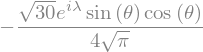

In [10]:
Ynm(2, 1, colat, lon).expand(func=True)

Поэтому напишем денормированную версию функции SymPy

In [11]:
def spherical_harmonics(n, m, colat, lon):
    sympy_Ynm = Ynm(n, m, colat, lon)
    denormalizing_factor = sqrt( (4*pi * factorial(n+m)) / ( (2*n + 1) * factorial(n-m) ) )
    return denormalizing_factor * sympy_Ynm

In [12]:
spherical_harmonics(2, 1, colat, lon).expand(func=True)

## Виды сферических функции

При $m=0$ имеем **зональные гармоники**, при $n=m$ – **секториальные**, а при $n\neq m$ – **тессеральные**.

![Сферические функции](sph_harmonics_n_max_3.png)

## Ортогональность и норма сферических функций

### Ортогональность

Сферические функции, как и присоединённые функции и полиномы Лежандра, образуют класс ортогональных функций. 

Докажем свойство ортогональности сферических функций. 

Возьмём две произвольные заданные внутри сферы (очевидно, что снаружи ничего не изменится) шаровые функции 
$$
U_k^s = r^k Y_k^s  \left( \vartheta, \lambda \right), \quad U_l^q = r^l Y_l^q  \left( \vartheta, \lambda \right),
$$
такие что 
$$l \neq k \quad\text{или}\quad s\neq q\quad\text{или}\quad l\neq k \ \text{и}\ s\neq q,$$ 
то есть либо с разными степенями (и любыми порядками), либо с разными порядками (и любыми степенями), либо с разными степенями и порядками.

Применим к ним вторую формулу Грина
$$
\int\limits_\tau\left[U_k^s\Delta U_l^q - U_l^q\Delta U_k^s \right] d\tau =
\int\limits_\sigma \left[U_k^s \dfrac{dU_l^q}{dn} -  U_l^q \dfrac{dU_k^s}{dn} \right] d\sigma.
$$
Здесь слева интегрирование ведётся в объёмной области внутри сферы $\tau$, а справа - по поверхности сферы $\sigma$. 

Так как $\Delta U_k^s = 0$ и $\Delta U_l^q = 0$, то получим
$$
\int\limits_\sigma \left[U_k^s \dfrac{dU_l^q}{dn} -  U_l^q \dfrac{dU_k^s}{dn} \right] d\sigma = 0.
$$

Направление  внешней нормали $n$ к сфере совпадает с направлением $r$, поэтому
$$
\int\limits_\sigma \left[U_k^s \dfrac{dU_l^q}{dr} -  U_l^q \dfrac{dU_k^s}{dr} \right] d\sigma = 0.
$$
откуда
$$
\int\limits_\sigma 
\left[r^{l+k-1} l  Y_l^q \left( \vartheta, \lambda \right) Y_k^s \left( \vartheta, \lambda \right) -  
r^{l+k-1} k Y_l^q \left( \vartheta, \lambda \right) Y_k^s \left( \vartheta, \lambda \right) \right] d\sigma = 0.
$$

Сокращая на $r^{l+k-1} (l - k)$, записываем

$$
\boxed{\int\limits_\sigma Y_l^q \left( \vartheta, \lambda \right) Y_k^s \left( \vartheta, \lambda \right) d\sigma = 0}, \quad l \neq k \quad\text{или}\quad s\neq q\quad\text{или}\quad l\neq k \ \text{и}\ s\neq q.
$$

Мы доказали, что **сферические функции ортогональны на сфере**.

Для правильности и удобства вычислений, напомним себе, что под интегралом по поверхности сферы мы понимаем следующее
$$
\int\limits_\sigma ... d\sigma = 
\int_{\vartheta = 0}^{\pi} \int_{\lambda = 0}^{2\pi} ... \sin{\vartheta} d\vartheta d\lambda,
$$
где $d\sigma = \sin{\vartheta} d\vartheta d\lambda$ является элементарной площадью на поверхности единичной сферы.

Проверяем ортогональность сферических функций.

Для $Y_2^1$ и $Y_2^2$:

In [13]:
Y21 = sph_harm(2 , 1, colat, lon)
Y22 = sph_harm(2 , 2, colat, lon)
simplify(integrate(Y21*Y22 * sin(colat), (colat, 0, pi), (lon, 0, 2*pi)).expand(func=True))

Для $Y_3^2$ и $Y_2^1$:

In [14]:
Y32 = sph_harm(3 , 2, colat, lon)
Y22 = sph_harm(2 , 2, colat, lon)

simplify(integrate(Y32*Y22 * sin(colat), (colat, 0, pi), (lon, 0, 2*pi)).expand(func=True))

Для $Y_3^2$ и $Y_2^1$:

In [15]:
Y32 = sph_harm(3 , 2, colat, lon)
Y21 = sph_harm(2 , 1, colat, lon)
simplify(integrate(Y32*Y21 * sin(colat), (colat, 0, pi), (lon, 0, 2*pi)).expand(func=True))

### Норма
Для случая, когда степени и порядки двух сферических функций равны, получим выражение для квадрата нормы, то есть
$$
\| Y_n^m \|^2 = \int\limits_\sigma \left[ Y_n^m \left( \vartheta, \lambda \right) \right]^2 d\sigma = 
\int\limits_\sigma \left[ P_n^m \left( \cos\vartheta \right) 
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}
\right]^2 d\sigma.
$$
Поскольку при $m=0$ 
$$ 
P_n^m \left( \cos\vartheta \right) \sin{m\lambda} = 0,\qquad
P_n^m \left( \cos\vartheta \right) \cos{m\lambda} = P_n \left( \cos\vartheta \right),
$$ 
то можно показать, что в этом случае 
$$
\| P_n \left( \cos\vartheta \right) \|^2 = \int\limits_\sigma \left[P_n \left( \cos\vartheta \right)\right]^2   d\sigma = \dfrac{4\pi}{2n + 1},
% \int\limits_\sigma \left[P_n^m \left( \cos\vartheta \right) \cos{m\lambda}\right]^2 d\sigma =
$$
а во всех остальных случаях
$$
\left\| P_n^m \left( \cos\vartheta \right) 
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix} \right\|^2
= \int\limits_\sigma \left[ P_n^m \left( \cos\vartheta \right) 
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}
\right]^2 d\sigma = \dfrac{2\pi}{2n + 1}\dfrac{(n+m)!}{(n-m)!}, \quad m\neq 0.
$$

Иными словами, квадрат нормы сферической функции равен
$$
\| Y_n^m \|^2 =
\begin{cases}
\dfrac{4\pi}{2n + 1}, & m = 0, \\
\dfrac{2\pi}{2n + 1}\dfrac{(n+m)!}{(n-m)!}, & m\neq 0.
\end{cases}
$$

In [16]:
def spherical_harmonics_norm(n, m):
    if m == 0:
        sqnorm = 4*pi / (2*n + 1)
    else:
        sqnorm = 2*pi * factorial(n+m) / ((2*n + 1) * factorial(n-m))
    return sqrt(sqnorm)

Например, для $\| Y_5^0 \| = \| P_5 (\cos{\vartheta}) \| $:

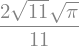

In [17]:
spherical_harmonics_norm(5, 0)

Проверяем прямым интегрированием:

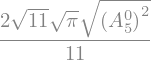

In [18]:
Y50 = sph_harm(5 , 0, colat, lon)
simplify(sqrt(integrate(Y50**2 * sin(colat),  (lon, 0, 2*pi), (colat, 0, pi)).expand(func=True)))

Поскольку написанная нами линейная комбинация имеет постоянные коэффициенты $A_n^m$ и $B_n^m$, то норма такой функции будет равна произведению нормы элементарной сферической функции на эти коэффициенты. Это мы и получили. 

Для $\| Y_2^1 \|$ (то есть $m\neq 0$):

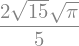

In [19]:
spherical_harmonics_norm(2, 1)

Проверяем аналогично:

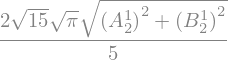

In [20]:
Y21 = sph_harm(2, 1, colat, lon)
simplify(sqrt(integrate(Y21**2 * sin(colat), (lon, 0, 2*pi), (colat, 0, pi)).expand(func=True)))

## Полностью нормированные сферические функции

Для разных приложений существуют разные способы нормирования сферических функций. В геодезии принято использовать так называемые полностью нормированные сферические функции.

Ранее для полиномов Лежандра мы уже вводили понятие полностью нормированных функций, то есть среднее интегральное значение которых на сфере равно единице. 

Для сферических функций это условие запишется так
$$
\boxed{
\dfrac{1}{4\pi}\int\limits_\sigma \left[ \overline{P_n^m \left( \cos\vartheta \right)
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}}
\right]^2 d\sigma = 1
}.
$$
То есть **квадрат нормы полностью нормированных сферических функций равен $4\pi$**. 

Нормированные сферические функции образуют на сфере систему ортонормированных функций.

Введём нормирующий множитель $N_n^m$, связывающий ненормированные и полностью нормированные сферические функции
\begin{align}
\overline{P_n^m \left( \cos\vartheta \right)
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}} =
N_n^m P_n^m \left( \cos\vartheta \right)
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}.
\end{align}
Тогда из выражений для нормы сферических функций легко получаем
$$
N_n^m =
\begin{cases}
\sqrt{2n + 1}, & m =0, \\
\sqrt{2 (2n+1) \dfrac{(n-m)!}{(n+m)!}}, & m \neq 0.
\end{cases}
$$
Запись последнего выражения можно упростить таким образом
$$
\boxed{
N_n^m = \sqrt{(2 - \delta) (2n + 1) \dfrac{(n-m)!}{(n+m)!}},\quad
\delta = 
\begin{cases}
1, & m = 0,\\
0, & m \neq 0. 
\end{cases}
}
$$


In [21]:
def normalizing_factor(n, m):
    if m == 0:
        delta = 1
    else:
        delta = 0
    return sqrt( (2 - delta) * (2 * n + 1) * factorial(n-m) / factorial(n+m) ) 

Ненормированная сферическая функция степени $n = 2$ и порядка $m = 1$ выглядит так

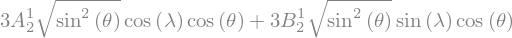

In [22]:
Y21

Нормирующий множитель $N_2^1$:

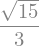

In [23]:
N21 = normalizing_factor(2, 1)
N21

Полностью нормированная сферическая функция $\overline{Y_2^1}$ степени $n = 2$ и порядка $m=1$ выглядит так

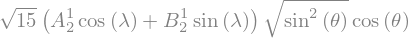

In [24]:
Y21_fn = simplify(Y21 * N21)
simplify(Y21_fn)

Проверяем квадрат нормы:

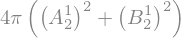

In [25]:
simplify(integrate(Y21_fn**2 * sin(colat), (lon, 0, 2*pi), (colat, 0, pi)).expand(func=True))

In [26]:
def sph_harm_basic_fn(n, m, colat, lon, cos_or_sin = 'both'):
    Nnm = normalizing_factor(n, m)
    lafnm_fn = (-1)**m * assoc_legendre(n, m, cos(colat)) * Nnm
    if cos_or_sin == 'cos':
        return cos(m * lon) * lafnm_fn
    elif cos_or_sin == 'sin':
        return sin(m * lon) * lafnm_fn
    elif cos_or_sin == 'both':
        return cos(m * lon) * lafnm_fn, sin(m * lon) * lafnm_fn
    
def sph_harm_fn(n, m, colat, lon):
    a = Symbol("\overline{A}_" + str(n) + '^' + str(m))
    b = Symbol("\overline{B}_" + str(n) + '^' + str(m))
    basics = sph_harm_basic_fn(n, m, colat, lon, 'both')
    return a*basics[0] + b*basics[1]

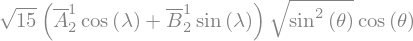

In [27]:
simplify(sph_harm_fn(2, 1, colat, lon))

## Разложение функции, заданной на сфере, в ряд сферических

Свойство ортогональности сферических функций делает их незаменимыми для аналитического представления физического поля, рельефа или других величин, заданных в виде карты на сферической поверхности.

Пусть на поверхности единичной сферы $\sigma$ задана функция $f \left(\vartheta, \lambda \right)$. Доказано, что любую функцию, заданную на сфере, можно разложить в ряд вида
\begin{align*}
f \left(\vartheta, \lambda \right) = \sum\limits_{n=0}^{\infty} Y_n \left(\vartheta, \lambda \right) =
\sum\limits_{n=0}^{\infty}\sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta}).
\end{align*}

Разложить функцию в ряд сферических это значит найти коэффициенты $A_n^m$ и $B_n^m$.

### Вывод формулы для коэффициентов разложения

Получим формулы для этих коэффицентов, пользуясь свойством ортогональности сферических функций. 

Умножим последнее выражение на элементарную сферическую функцию $P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} $ и проинтегрируем по сфере $\sigma$, получим
\begin{align*}
\int\limits_{\sigma} f \left(\vartheta', \lambda' \right) P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} d \sigma = 
\int\limits_{\sigma}
\left[ \sum\limits_{n=0}^{\infty}\sum\limits_{m=0}^n (A_n^m \cos{m \lambda'} + B_n^m \sin{m \lambda'}) P_n^m (\cos{\vartheta'}) \right]  P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} d \sigma.
\end{align*}

Здесь $\vartheta', \lambda'$ - сферические координаты переменной (текущей) точки. По свойству ортогоноальности, у нас останется
\begin{align*}
\int\limits_{\sigma} f \left(\vartheta', \lambda' \right) P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} d \sigma = 
A_n^m \int\limits_{\sigma} \left[ P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'}  \right]^2 d\sigma,
\end{align*}
а из выражения для квадрата нормы следует
\begin{align*}
\int\limits_{\sigma} f \left(\vartheta', \lambda' \right) P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} 
d \sigma = \dfrac{4\pi}{{N_n^m}^2} A_n^m,
\end{align*}
откуда
\begin{align*}
A_n^m = \dfrac{1}{4\pi} {N_n^m}^2 \int\limits_{\sigma} f \left(\vartheta', \lambda' \right) P_n^m \left( \cos\vartheta' \right) \cos{m\lambda'} d \sigma.
\end{align*}
Формулу для коэффициента $B_n^m$ получим аналогично; в этом случае нужно начать с умножения на $P_n^m \left( \cos\vartheta' \right) \sin{m\lambda'} $. В результате получим
\begin{align*}
B_n^m = \dfrac{1}{4\pi} {N_n^m}^2 \int\limits_{\sigma} f \left(\vartheta', \lambda' \right) P_n^m \left( \cos\vartheta' \right) \sin{m\lambda'} d \sigma.
\end{align*}

Для полностью нормированных сферических функций полностью нормированные коэффициенты разложения можно получить аналогично
\begin{equation*}
\begin{Bmatrix}
\overline{A_n^m} \\
\overline{B_n^m}
\end{Bmatrix}
= \dfrac{1}{4\pi} \int\limits_{\sigma} f \left(\vartheta', \lambda' \right) 
\overline{
P_n^m \left( \cos\vartheta' \right) 
\begin{Bmatrix}
\cos{m\lambda'} \\
\sin{m\lambda'}
\end{Bmatrix}
}
d \sigma.
\end{equation*}

Из последних трёх выражений можно получить связь между ненормированными и полностью нормированными коэффициентами разложения

\begin{equation*}
\begin{Bmatrix}
\overline{A_n^m} \\
\overline{B_n^m}
\end{Bmatrix} = \dfrac{1}{N_n^m}
\begin{Bmatrix}
A_n^m\\
B_n^m
\end{Bmatrix}.
\end{equation*}

Полученные нами выражения для вычисления как ненормированных $A_n^m, B_n^m$, так и полностью нормированных $\overline{A_n^m}, \overline{B_n^m}$ коэффициентов на практике использовать затруднительно. 

Связано это с тем, что известные значения функций $f \left( \vartheta, \lambda \right)$ реальных явлений известны дискретно, то есть в конечном числе точек , а не в виде непрерывных аналитических функций, которые можно сразу интегрировать. 

Возможны два варианта исходных данных:
1. Известны значения $f_i \left(\vartheta_i, \lambda_i \right)$ функции $f \left(\vartheta, \lambda \right)$ в $(N+1)^2$ или более произвольно расположенных точках на поверхности сферы. 

1. Известны средние $\overline{f_i} \left(\vartheta_i, \lambda_i \right)$   значения функции на всей поверхности сферы по одинаковым по размерам трапециям $\Delta\vartheta \times \Delta\lambda$.

### Определение коэффициентов из решения линейных уравнений
В первом случае уравнение
\begin{align*}
f \left(\vartheta, \lambda \right) =
\sum\limits_{n=0}^{N}\sum\limits_{m=0}^n (A_n^m \cos{m \lambda} + B_n^m \sin{m \lambda}) P_n^m (\cos{\vartheta})
\end{align*}
решается под условием
\begin{equation}
\sum_i \left( f_i - f \right)^2 = {\rm min}.
\end{equation}
Определение коэффициентов разложения в этом случае не требует информации о функции $f \left(\vartheta, \lambda \right)$ на всей поверхности сферы. 

Например, ряд Лапласа степени $N = 6$ содержит $(N + 1)^2 = 49$ коэффициентов. Следовательно, для определения этих коэффициентов необходимо знать значения $f_i \left(\vartheta_i, \lambda_i \right)$  функции в 49 точках на поверхности сферы. 

Очевидно, что в случае, когда число точек больше минимально необходимого, то получается переопределённая задача, которая решается методом наименьших квадратов.

Этот способ определения коэффициентов имеет существенный недостаток для описания реальных явлений: он не предъявляет никаких требований к равномерности покрытия исходными данными поверхности сферы. Это означает, что в зонах, где отсутствовали исходные данные («белые пятна»), аппроксимирующая функция в виде ряда Лапласа может неадекватно описывать функцию реального явления или делать это с большими ошибками.По этой причине, несмотря на простоту, этот способ определения коэффициентов практически не применяется.

Для повышения достоверности определяемых коэффициентов можно учесть измерения по всей сфере и вместо точечных значений функции  $f \left(\vartheta, \lambda \right)$ использовать осреднённые на некоторой площади. Однако чаще в этом случае применяют следующий метод.

### Определение коэффициентов методом численного интегрирования

Во втором случае для определения коэффициентов применяется метод численного интегрирования. 

Пусть поверхность сферы разбита параллелями  и меридианами на $I$ сферических трапеций $\Delta\sigma$ (или «ячеек») с шагом $\Delta \vartheta$ и $\Delta\lambda$. 

В каждой такой трапеции $i$ заданы средние значения $\overline{f_i} \left(\vartheta_i, \lambda_i \right) $ функции $f \left(\vartheta, \lambda \right)$, аналитический вид которой в общем случае неизвестен. Координаты $\vartheta_i, \lambda_i $ относятся к центру трапеции.

Тогда, применяя правило численного интегрирования, получим формулу для вычисления полностью нормированных коэффициентов следующего вида
\begin{equation*}
\begin{Bmatrix}
\overline{A_n^m} \\
\overline{B_n^m}
\end{Bmatrix}
= \dfrac{1}{I} \sum\limits_{i=1}^{I} \overline{f_i} \left(\vartheta_i, \lambda_i \right) 
\left[
\overline{
P_n^m \left( \cos\vartheta \right) 
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}
}
\right]_i
\Delta\sigma_i,
\end{equation*}
где
\begin{equation*}
\left[
\overline{
P_n^m \left( \cos\vartheta \right) 
\begin{Bmatrix}
\cos{m\lambda} \\
\sin{m\lambda}
\end{Bmatrix}
}
\right]_i
\end{equation*}
являются средними значениями полностью нормированных сферических функций в трапеции $i$, $\Delta\sigma_i$ - площадь ячейки.

Главной трудностью такого способа определения коэффициентов является необходимость знания средних значений $\overline{f_i}$ функции $f$ непрерывно **по всей поверхности сферы** $\sigma$.

## Применение сферических функций к решению краевых задач

Краевой задачей теории потенциала называют определение гармонической функции, удовлетворяющей на границе области существования граничному или краевому условию.

Если гармоническая область определяется внутри замкнутой области, краевая задача называется внутренней, если ищется гармоническая функция в бесконечной области, задача называется внешней. Решение внешней задачи должно быть регулярным на бесконечности.

При постановке краевой задачи должны выполняться условия:
- решение должно существовать;
- решение должно быть единственным;
- решение должно быть устойчивым.

Если эти условия выполнены, то задача называется корректной или корректно поставленной.

В общем случае, при произвольной форме краевой поверхности, решение краевых задач представляет сложную проблему. Однако когда в качестве краевой поверхности служит для сферы, проблема значительно упрощается.

В зависимости от вида краевого условия различают три вида краевых задач теории потенциала. Далее мы сформулируем их и будем считать, что краевые условия заданы на сфере, а потому можно применить аппарат сферических функций для построения решения.

### Первая краевая задача (Дирихле)


### Вторая краевая задача (Неймана)


### Третья краевая задача (Робена)
